<a href="https://colab.research.google.com/github/kcunni/OnePieceReddit/blob/main/NetworkX%2BMatplotlib_One.Piece.analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install praw
! pip install networkx
! pip install matplotlib


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



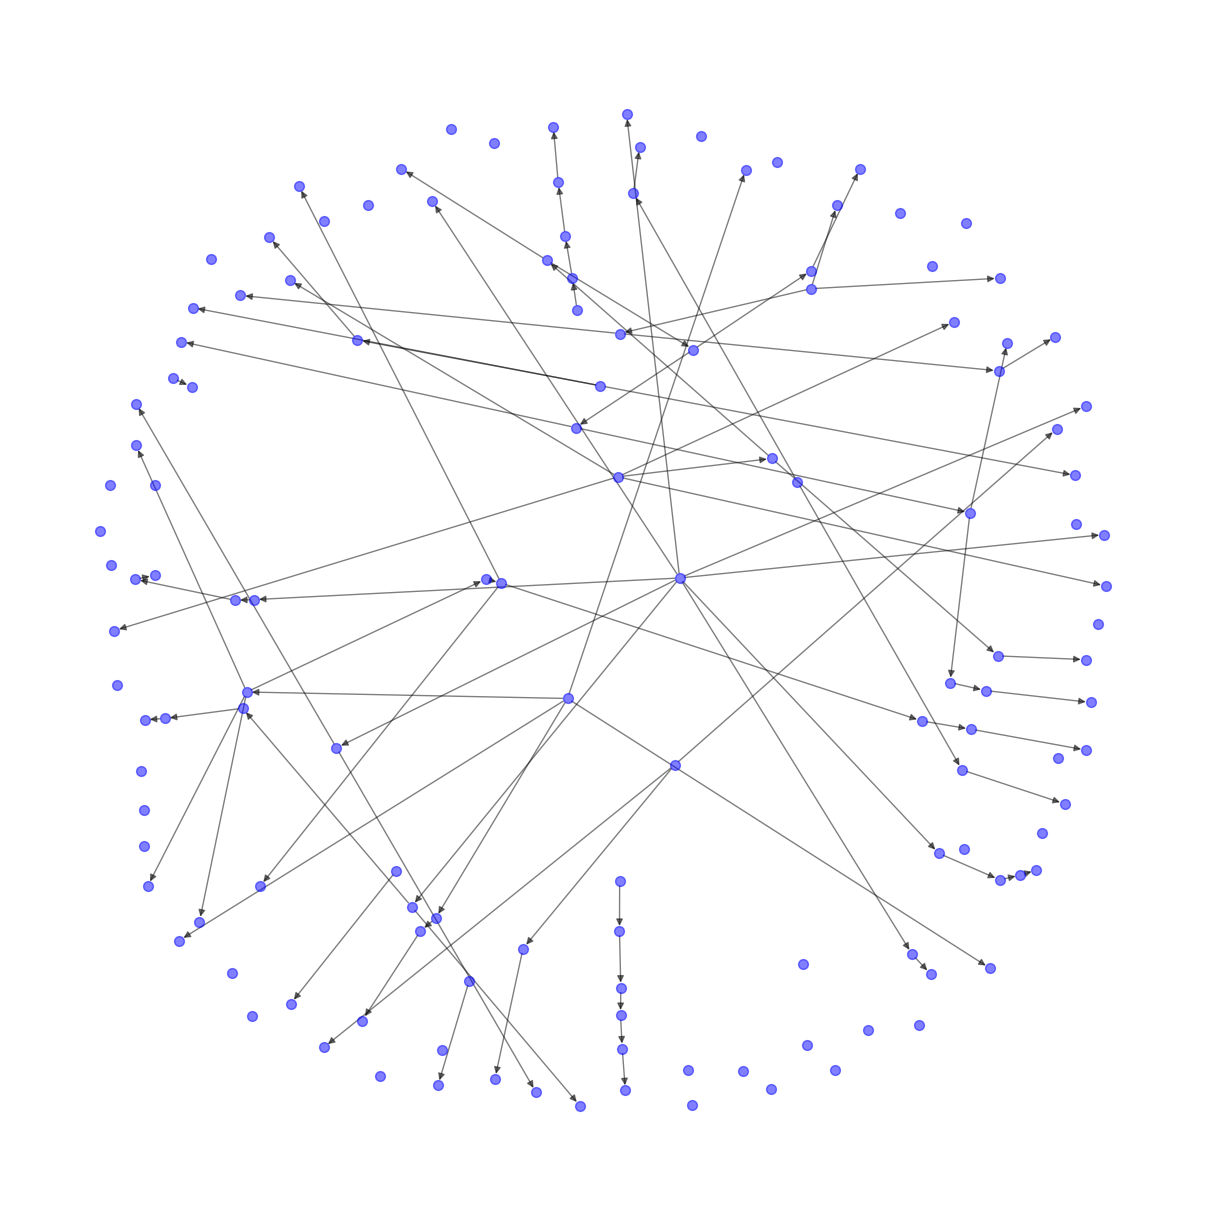

In [ ]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

# Create a Reddit instance with your app credentials
reddit = praw.Reddit(
    client_id='-VLf3gA9b467OWlArqlC4A',
    client_secret='bAdncZTD1MCTxX0TSq-J1xf1OL7kBg',
    user_agent='Reddit Data by u/k-cunni'
)

# The ID of the post you're interested in
post_id = '1bkzjz5'

# Get the post
post = reddit.submission(id=post_id)

# Set the post comment sort to 'new'
post.comment_sort = 'new'

# Get the post comments
post.comments.replace_more(limit=None)

# Create a directed graph
G = nx.DiGraph()

def add_comments_to_graph(comments, parent_id=None):
    for comment in comments:
        G.add_node(comment.id, body=comment.body)
        if parent_id is not None:
            G.add_edge(parent_id, comment.id)
        if len(comment.replies) > 0:
            add_comments_to_graph(comment.replies, comment.id)

add_comments_to_graph(post.comments)

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_size=50, alpha=0.5, node_color="blue", with_labels=False)
plt.show()


Researchers use a variety of methods to visualize data retrieved from Reddit. Here are some common methods:

**Bar Charts and Histograms:** These are used to represent the frequency of occurrence of different categories of data. For example, the number of posts in different subreddits, or the number of comments on posts with different tags.

**Pie Charts:** These are used to represent the proportion of different categories in the total data. For example, the proportion of posts in a subreddit that belong to different categories.

**Word Clouds:** These are used to represent the frequency of different words in the text data. The size of each word in the word cloud represents its frequency. This can be used to analyze the most frequently used words in the comments or posts of a subreddit.

Time Series Plots: These are used to represent how a variable changes over time. For example, the number of posts in a subreddit over time, or the number of upvotes on a post over time.

Network Graphs: These are used to represent relationships between different entities. For example, a network graph can be used to represent the relationships between different users based on their interactions (comments, upvotes, etc.)1.

Heatmaps: These are used to represent the correlation between different variables. For example, a heatmap can be used to represent the correlation between the time of posting and the number of upvotes.

Tree Maps: These are used to represent hierarchical data. For example, a tree map can be used to represent the hierarchy of comments in a post.

Geographical Maps: If the data includes geographical information (such as user location), geographical maps can be used to visualize the data.

*These visualizations can be created using various tools and programming languages. Python, with libraries like Matplotlib, Seaborn, and Plotly, is commonly used for creating these visualizations2. Other tools like Tableau and Power BI are also popular.*


### ***WORD CLOUD***

In [ ]:
! pip install wordcloud

In [ ]:
from wordcloud import WordCloud

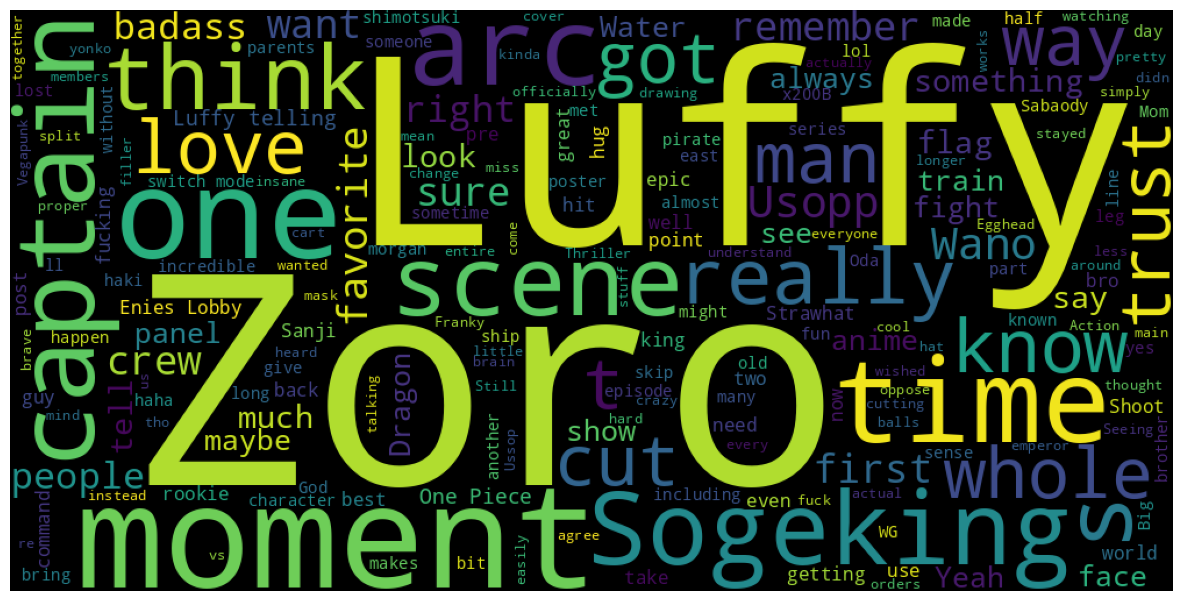

In [ ]:
def get_comments_text(comments, text=''):
    for comment in comments:
        text += ' ' + comment.body
        if len(comment.replies) > 0:
            text = get_comments_text(comment.replies, text)
    return text

comments_text = get_comments_text(post.comments)

# Generate a word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(comments_text)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### ***HEAT MAP***

In [ ]:
! pip install seaborn
! pip install pandas

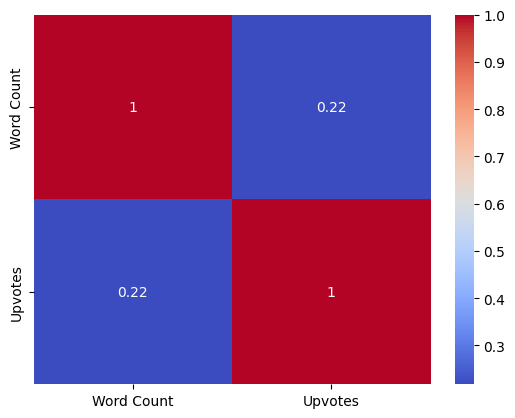

In [ ]:
#This script will create a heatmap showing the correlation between the word count of “sanji” in each comment and
#the number of upvotes that comment received. The correlation value ranges from -1 to 1, where
#1 means a strong positive correlation, -1 means a strong negative correlation, and 0 means no correlation.
import praw
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def get_comments_data(comments, data=[]):
    for comment in comments:
        word_count = comment.body.lower().count('sanji')
        data.append((word_count, comment.score))
        if len(comment.replies) > 0:
            get_comments_data(comment.replies, data)
    return data

data = get_comments_data(post.comments)

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['Word Count', 'Upvotes'])

# Generate a heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# ***Social network analysis (?)***

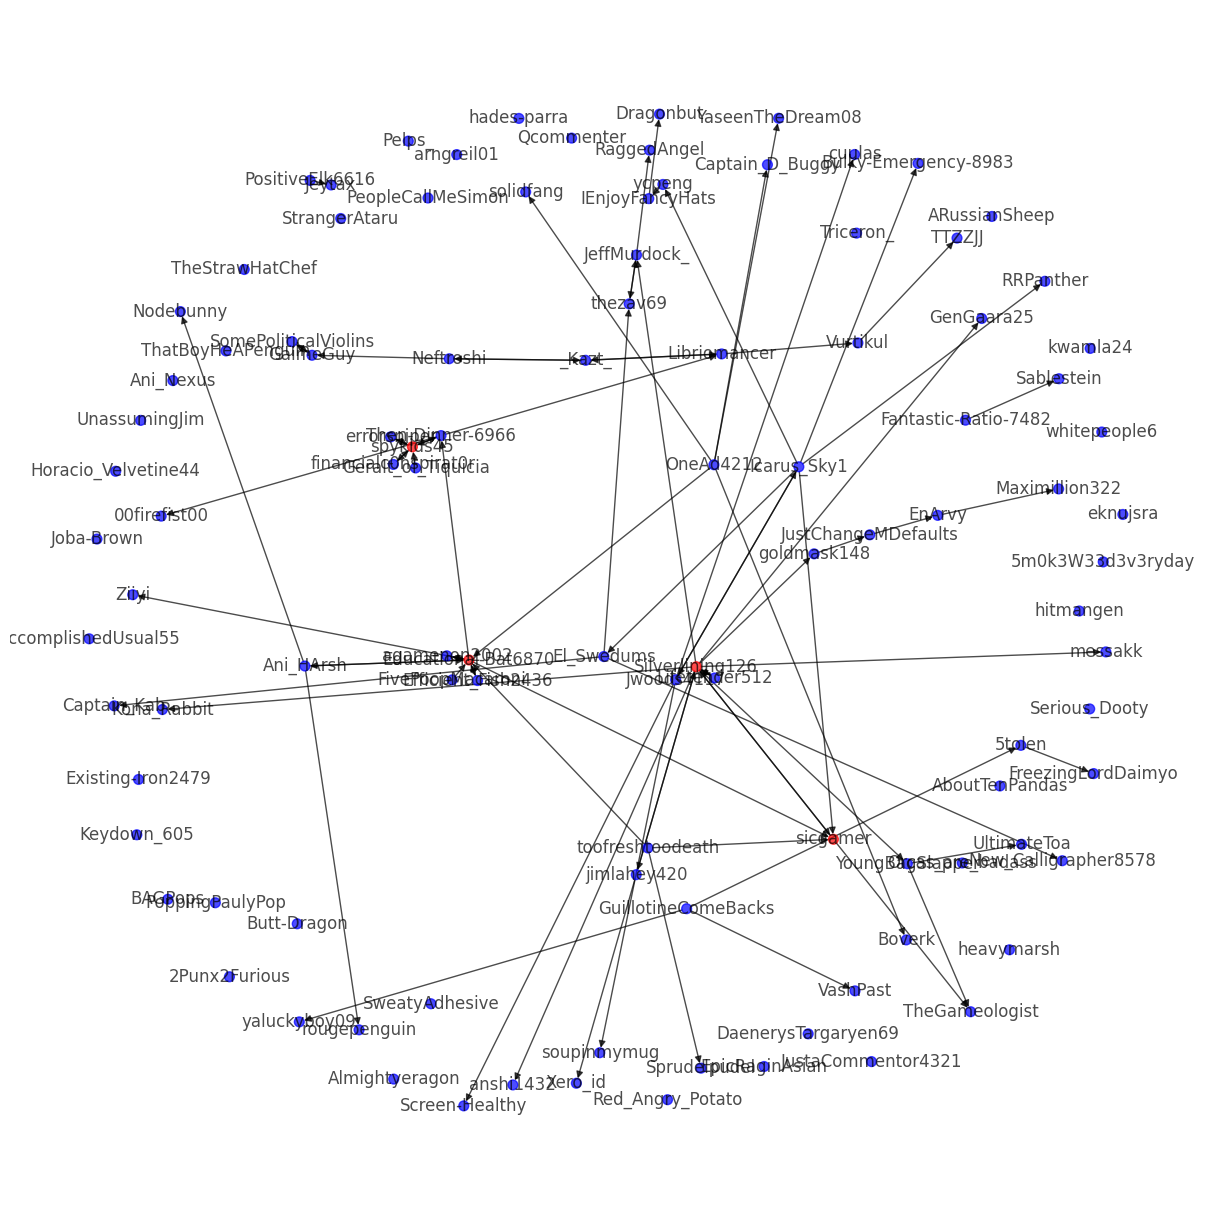

In [ ]:


# Create a directed graph
G = nx.DiGraph()

def add_comments_to_graph(comments, parent_author=None):
    for comment in comments:
        G.add_node(comment.author.name)
        if parent_author is not None:
            G.add_edge(parent_author, comment.author.name)
        if len(comment.replies) > 0:
            add_comments_to_graph(comment.replies, comment.author.name)

add_comments_to_graph(post.comments)

# Calculate the number of comments made by each user
user_comments = {user: 0 for user in G.nodes()}
for edge in G.edges():
    user_comments[edge[1]] += 1

# Define a color map based on the number of comments
color_map = ['red' if user_comments[node] > 2 else 'blue' for node in G.nodes()]

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_color=color_map, with_labels=True, alpha=0.7, node_size=50)
plt.show()


In the context of a network graph:

A **node** represents an entity in the network. In the case of the Reddit interaction graph, each node represents a user who has made a comment.

An **edge** represents a relationship or interaction between two entities. In a directed graph, the edges have a direction, meaning that the relationship they represent is not symmetrical.
*In the case of the Reddit interaction graph, a directed edge from User A to User B represents that User A has replied to a comment made by User B. The direction of the edge is important here: it shows who replied to whom.*

In the context of this Reddit interaction graph, a node is a user, and a directed edge represents a reply from one user to another. The direction of the edge indicates the direction of the reply.